# Predicting Continuous Target Variables with Regression Analysis

Throughout the previous chapters, you learned a lot about the main concepts behind **supervised leaning** and trained many different models for classification tasks to predict group memberships or categorical variables. In this chapter, we will dive into another subcategory of supervised learning: **regression analysis**. 

Regression models are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science as well as applications in industry, such as understanding relationship between variables, evaluating trends, or making forecasts. One example would be predicting the sales of a company in future months. 

In this chapter, we will discuss the main concepts of regression models and cover the following topics:

* Exploring and visualizing dataset
* Looking at different approachs to implement linear regression models
* Training regression models that are robust to outliers
* Evaluating regression models and diagnosing common problems
* Fitting regression models to nonlinear data

# Introducing linear regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable. As discussed earlier, regression analysis is a subcategory of supervised machine learning. In contrast to classification - another subcategory of supervised learning - regression analysis aims to predict outputs on a continuous scale rather than categorical class labels. 

In the following subsections, we will introduce the most basic type of linear regression, simple linear regression, and relate it to the more general, multivariate case (linear regression with multiple features). 

## Simple linear regression

The goal of simple (**univariate**) linear regression is to model the relationship between a singe feature (**explanatory variable** x) and a continuous valued **response** (**target variable** y). The equation of a linear model with one explanatory variable is defined as follows:

$$y = w_0 + w_1x$$

Here, the weigth $w_0$ represents the *y*-axis intercept and $w_1$ is the weight coefficient of the explanatory variable. Our goal is to learn the weights of the linear equation to describe the relationship between the explanatory variable and the target variable, which can then be used to predict the responses of new explanatory variables that were not part of the training dataset. 

Based on the linear equation that we defined previously, linear regression can be understood as finding the best-fitting straight line through the sample points, as shown in the following figure: 

<img src='images/10_01.png'>

This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the sample points are the so-called **offsets** or **residuals** - the errors of our prediction. 

## Multiple linear regression

The special case of linear regression with one explanatory variable that we introduced in the previous subsection is also called **simple linear regression**. Of course, we can also generalize the linear regression model to multiple explanatory variables; this process is called **multiple linear regression**: 

$$y = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^m w_ix_i = w^Tx$$

Here, $w_0$ is the *y*-axis intercept with $x_0 = 1$.

The following figure shows how the two-dimensional, fitted hyperplane of a multiple linear regression model with two features could look: 

<img src='images/10_15.png'>

As we can see, visualizing multiple linear regression fits in three-dimensional scatter plot are already challenging to interpret when looking at static figures. Since we have no good means of visualizing hyperplanes with two dimensions in the scatterplot (multiple linear regression models fits to datasets with three or more features), the examples and visualizations in this chapter will mainly focus on the univariate case, using simple linear regression. However, simple and multiple linear regression are based on the same concepts and the same evaluation techniques; the code implementations that we will discuss in this chapter are also compatible with both types of regression model. 

# Exploring the Housing dataset

Before we implement our first linear regression model, we will introduce a new dataset, the Housing dataset, which contains information about houses in the suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing dataset has been made freely available and is included in the code bundle of this book. As with each new dataset, it is always helpful to explore the data through a simple visualization, to get a better feeling of what we are working with. 

## Loading the Housing dataset into a data frame

In this section, we will load the Housing dataset using the pandas *read_csv* function, which is fast and versatile - a recommended tool for working with tabular data stored in a plaintext format. 

The features of the 506 samples in the Housing dataset are summarized here: 

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25.000 sq. ft.
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charler River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per \$10.000
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in \$1000s

For the rest of this chapter, we will regard the house prices (MEDV) as our target variable - the variable that we want to predict using one or more of the 13 explanatory variables. Before we explore this dataset further, let us copy it from the UCI repository intoa pandas DataFrame: 

In [1]:
import pandas as pd

df = pd.read_csv('housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

**Exploratory Data Analysis (EDA)** is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationship between variables. 

First, we will create a **scatterplot matrix** that allows us to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, we will use the *pairplot* function from the Seaborn library, which is a Python library for drawing statistical plots based on Matplotlib. 

You can install *seaborn* package via *pip install seaborn*. After the installation is complete, you can import the package and create the scatterplot matrix as follows: 

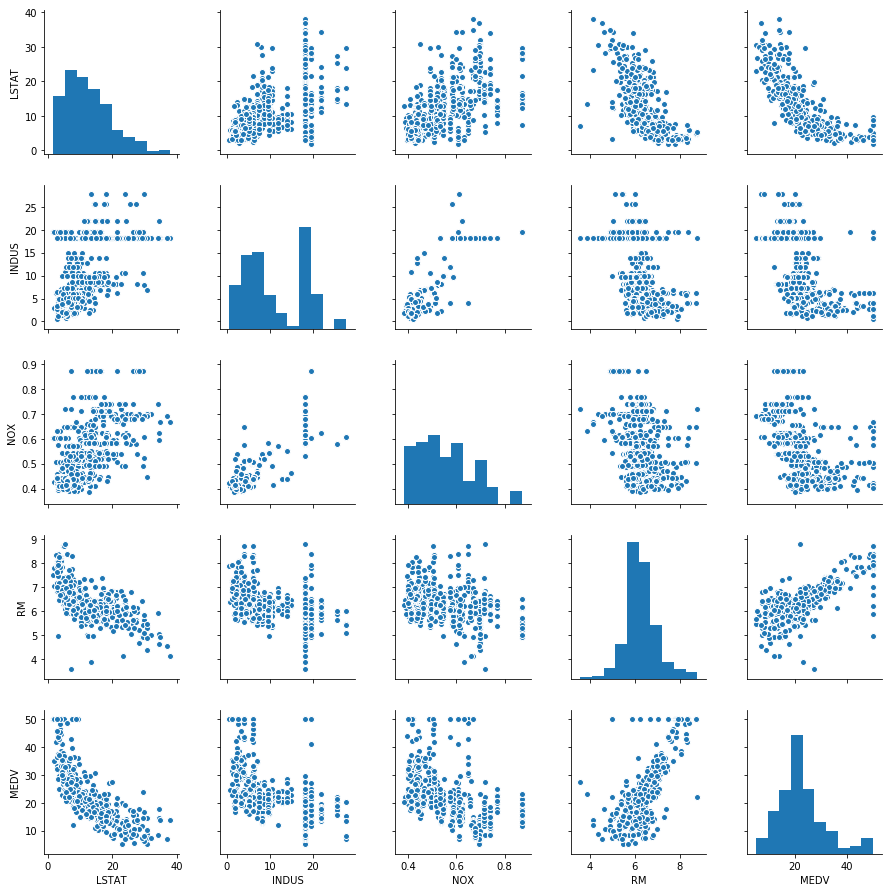

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Due to space constaints and in the interest of readability, we only plotted five columns from the dataset: *LSTAT*, *INDUS*, *NOX*, *RM*, and *MEDV*. However, you are encouraged to create a scatterplot matrix of the whole *DataFrame* to explore the dataset further by choosing different column names in the previous *sns.pairplot* call, or include all variables in the scatterplot matrix by omitting the column selector (*sns.pairplot(df)*). 

Using this scatterplot matrix, we can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between *RM* and house prices, *MEDV* (the fifth column of the fourth row). Furthermore, we can see in the histogram - the lower-right subplot in the scatter plot matrix - that the *MEDV* variable seems to be normally distributed but contains several outliers. 

Note that in contrast to common belief, training a linear regression model does not require that the explanatory or target variables are normally distributed. The normality assumption is only a requirement for certain statistics and hypothesis tests that are beyond the scope of this book. 

## Looking at relationships using a correlation matrix

In the previous section, we visualized the data distributions of the Housing dataset variables in the form of histograms and scatter plots. Next, we will create a correlation matrix to quantify and summarize linear relationships between variables. A correlation matrix is closely related to the covariance matrix that we have seen in the section about **Principal Component Analysis (PCA)**. Intuitively, we can interpret the correlation matrix as a rescaled version of the covariance matrix. In fact, the correlation matrix is identical to a covariance matrix computed from standardized features. 

The correlation matrix is a square matrix that contains the **Pearson product-moment correlation coefficient** (often abbreviated as **Pearson's r**), which measures the linear dependence between pairs of features. The correlation coefficients are in the range -1 to 1. Two features have a perfect positive correlation if $r=1$, no correlation if $r=0$, and a perfect negative correlation if $r=-1$. As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two features $x$ and $y$ (numerator) divided by the product of their standard deviations (denominator): 

$r = \frac{\sum_{i=1}^n \left[ (x^{(i)} - \mu_x)(y^{(i)} - \mu_y) \right]}{\sqrt{\sum_{i=1}^n (x^{(i)} - \mu_x)^2} \sqrt{\sum_{i=1}^n(y^{(i)} - \mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$

Here, $\mu$ denotes the sample mean of the corresponding feature, $\sigma_{xy}$ is the covariance betweent the variables $x$ and $y$, and $\sigma_x$ and $\sigma_y$ are the features' standard deviation. 

In the following code example, we will use NumPy's *corrcoef* function on the five feature columns that we previously visualized in the scatterplot matrix, and we will use Seaborn's *heatmap* function to plot the correlation matrix array as a heat map: 

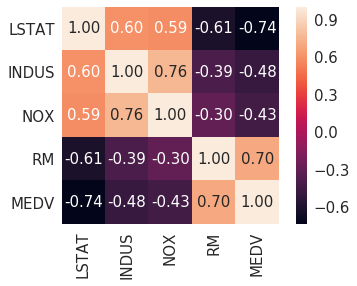

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols, xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable *MEDV*. Looking at the previous correlation matrix, we see that our target variable *MEDV* shows the largest correlation with the *LSTAT* variable (-0.74); however, as you might remember from inspecting the scatterplot matrix, there is a clean nonlinear relationship between *LSTAT* and *MEDV*. On the other hand, the correlation between *RM* and *MEDV* is also relatively high (0.70). Given the linear relationship between these two variables that we observed in the scatterplot, *RM* seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression model in the following subsection. 

# Implementing an ordinary least squares linear regression model

At the beginning of this chapter, we mentioned that linear regression can be understood as obtaining the best-fitting straight line through the sample points of our training data. However, we have neither defined the term **best-fitting** nor have we discussed the different techniques of fitting such a model. In the following subsections, we will fill in the missing pieces of this puzzle using the **Ordinary Least Squares (OLS)** method (sometimes also called **linear least squares**) to estimate the parameters of the linear regression line that minimizes the sum of the squared vertical distances (residuals or errors) to the sample points. 

## Solving regression for regression parameters with gradient descent 

Consider our implementations of the **ADAptive LInear NEuron (Adaline)**; we remember that the artificial neuron uses a linear activation function. Also, we defined a cost function $J$, which we minimized to learn the weights via optimizatino algorithms, such as **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)**. This cost function in Adaline is the **Sum of Squared Errors (SSE)**, which is identical to the cost function that we use for OLS: 

$$J(w) = \frac{1}{2}\sum_{i=1}^n(y^{(i)} - ŷ^{(i)})^2$$

Here, $ŷ$ is the predicted value $ŷ = w^Tx$. Essentialy, OLS regression can be understood as Adaline without the unit step function so that we obtain continuous target values instead of the class models -1 and 1. To demonstrate this, let us take the GD implementation of the Adaline and remove the unit step function to implement our first linear regression model: 

In [4]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

To see our *LinearRegressionGD* regressor in action, let's use the *RM* (number of rooms) variable from the Housing dataset as the explanatory variable and train a model that can predict *MEDV* (house prices). Furthermore, we will standardize the variables for better convergence of the GD algorithm. The code is as follows: 

In [5]:
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df[['MEDV']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

We discussed previously that it is always a good idea to plot the cost as a function of the number of epochs passes over the training dataset when we are using optimization algorithms, such as gradient descent, to check the algorithm converged to a cost minimum (here, a global cost minimum): 

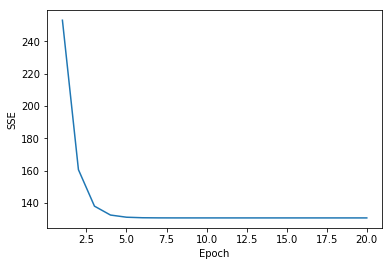

In [6]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

Next, let's visualized how well the linear regression line fits to the training data. To do so, we will define a simple helper function that will plot a scatterplot of the training samples and add the regression line: 

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

Now, we will use this *lin_regplot* function to plot the number of rooms against house price: 

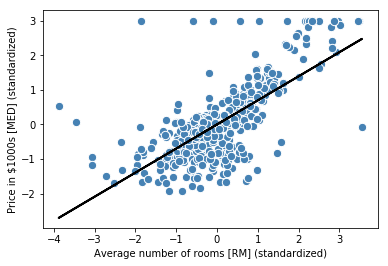

In [8]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MED] (standardized)')
plt.show()

As we can see in the resulting plot, the linear regression line reflects the general trend that house prices tend to increase with the number of rooms. 

Although this observation makes intuitive sense, the data also tells us that the number of rooms does not explain the house prices very well in many cases. Later in this chapter, we will discuss how to quantify the performance of a regression model. Interestingly, we also observe that several data points lined up at $y=3$, which suggests that the prices may have been clipped. In certain applications, it may also be important to report the predicted outcome variables on their original scale. To scale the predicted price outcome back onto *Price in $1000s* axis, we can simply apply the *inverse_transform* method of the *StandardScaler*: 

In [9]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(1, -1))
price_std = lr.predict(num_rooms_std)
print('Price in $1000s: %.3f' % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In this code example, we used the previously trained linear regression model to predict the price of a house with five rooms. According to our model, such a house is worth \$10.840. 

On a side note, it is also worth mentioning that we technically do not have to update the weights of the intercept if we are working with standardized variables since the *y*-axis intercept is always 0 in those cases. We can quickly confirm this by printing the weights: 

In [10]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000000


## Estimating coefficient of a regression model via scikit-learn

In the previous section, we implemented a working model for regression analysis; however, in a real-world application we may be interested in more efficient implementations. For example, many of scikit-learn's estimators for regression make use of the **LIBLINEAR** library, advanced optimization algorithms, and other code optimizations that work better with unstandardized variables, which is sometimes desirable for certain applications: 

In [11]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


As we can see from executing this code, scikit-learn's *LinearRegression* model, fitted with the unstardardized *RM* and *MEDV* variables, yielded different model coefficients. Let's compare it to our GD implementation by plotting *MEDV* against *RM*: 

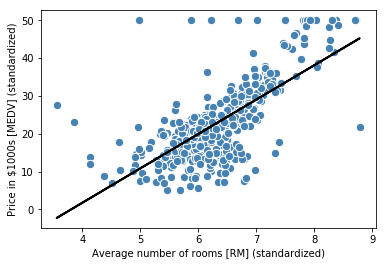

In [12]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Now, when we plot the training data and our fitted model by executing this code, we can see that the overall result looks identical to our GD implementation. 

As an alternative to using machine learning libraries, there is also a closed-form solution for solving OLS involving a system of linear equations that can be found in most introductory statistics textbooks: 

$$w = (X^TX)^{-1}X^Ty$$

We can implement it in Python as follows:

In [13]:
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


The advantage of this method is that it is guaranteed to find the optimal solution analytically. However, if we are working with very large databasets, it can be computationally too expensive to inverte the matrix in this formula (sometimes also called the **normal equation**) or the sample matrix may be singular (non-invertible), which is why we may prefer iterative methods in certain cases. 

# Fitting a robust regression model using RANSAC

Linear regression models can be heavily impacted by the presence of outliers. In certain situation, a very small subset of our data can have a big effect on the estimated model coefficients. There are many statistical tests that can be used to detect outliers, which are beyond the scop of the book. However, removing outliers always require our own judgement as data scientists as well as our domain knowledge. 

As an alternative to throwing out outliers, we will look at a robust method of regression using the **RANdom SAmple Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called inliers. 

We can summarize the iterative RANSAC algorithm as follows: 

1. Select a random number of samples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers. 
3. Refit the model using all inliers. 
4. Estimate the error of the fitted model versus the inliers. 
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise. 

Let us wrap our linear model in the RANSAC algorithm using scikit-learn'a *RANSACRegressor* class:

In [15]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

We set the maximum number of iterations of the *RANSACRegressor* to 100, and using *min_samples=50*, we set the minimum number of the randomly chosen samples to be at least 50. Using the *'absolute_loss'* as an argument for the *residual_metric* parameter, the algorithm computes absolute vertical distances between the fitted line and the sample points. By setting the *residual_threshold* parameter to 5.0, we only allowed samples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units, which works well on this particular dataset. 

By default, scikit-learn uses the **MAD** estimate to select the inlier threshold, where MAD stands for the **Median Absolute Deviation** of the target values *y*. However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC. Many different approaches have been developed in recent years to select a good inlier threshold automatically. 

After we fit the RANSAC model, let's obtain the inliers and outliers from the fitted RANSAC-linear regression model and plot them together with the linear fit: 

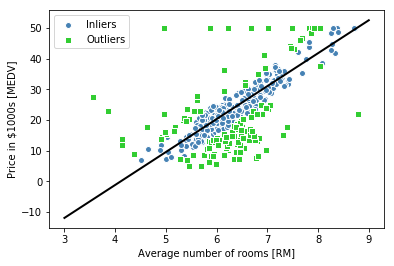

In [17]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

As we can see in the resulting scatterplot, the linear regression model was fitted on the detected set of inliers, shown as circles. 

When we print the slope and intercept of the model by executing the following code, we can see that the linear regression line is slightly different from the fit that we obtained in the previous section without using RANSAC:

In [18]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we do not know if this approach has a positive effect on the predictive performance for unseen data. Thus, in the next section we will look at different approaches to evaluating a regression model, which is a crucial part of building systems for predictive modeling. 